In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Implementing Factor Analysis

In [16]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [19]:
train_data = np.array(train, dtype = 'float32')
image = []
for i in range(0, 60000):
    img = train_data[i].flatten()
    image.append(img)

In [20]:
image = np.array(image)

In [21]:
feat_cols = ['pixel'+ str(i) for i in range(image.shape[1])]
df = pd.DataFrame(image, columns = feat_cols)
df['label'] = train['label']
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
59996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59997,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,162.0,163.0,135.0,94.0,0.0,0.0,0.0,0.0,0.0,8
59998,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [25]:
#using factor analysis to decompose
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components = 3).fit_transform(df[feat_cols].values)

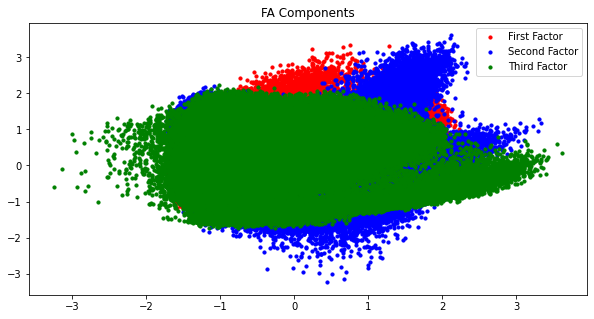

In [52]:
plt.figure(figsize = (10,5))
plt.title('FA Components')
plt.scatter(fa[:, 0], fa[:, 1], c = 'r', s = 10)
plt.scatter(fa[:, 1], fa[:, 2], c = 'b', s = 10)
plt.scatter(fa[:, 2], fa[:, 0], c = 'g', s = 10)
plt.legend(('First Factor', 'Second Factor', 'Third Factor'))

### Implementing PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_result = pca.fit_transform(df[feat_cols].values)

Text(0, 0.5, 'Variance')

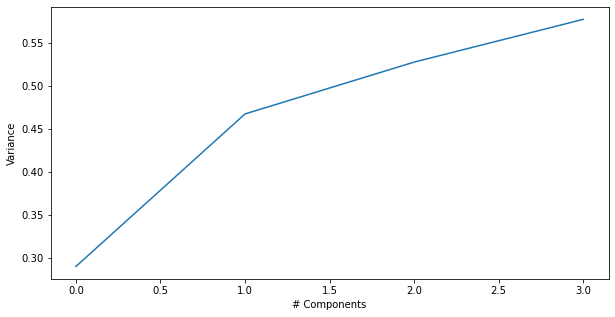

In [53]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# Components')
plt.ylabel('Variance')

Text(0.5, 1.0, 'Principal Component Analysis')

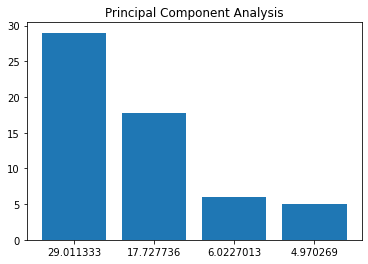

In [69]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xticks(index, pca.explained_variance_ratio_ * 100)
plt.title('Principal Component Analysis')

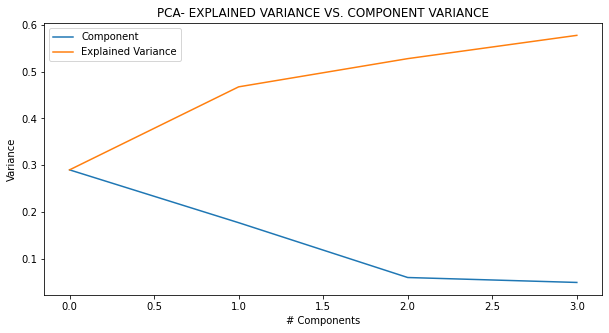

In [75]:
plt.figure(figsize = (10,5))
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA- EXPLAINED VARIANCE VS. COMPONENT VARIANCE')
plt.xlabel('# Components')
plt.ylabel('Variance')
plt.legend(('Component', 'Explained Variance'))